In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [2]:
user_types = ("female over 25", "male over 25" , "male under 25", "female under 25")  # possible different types of users
# click probabilities
true_click_probs = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],      # female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8],      # male over 25
    [0.2, 0.4, 0.8, 0.6, 0.5],      # male under 25
    [0.2, 0.4, 0.8, 0.6, 0.5]       # female under 25 (similar preferences)
    ])

best_article_click_probs = np.max(true_click_probs, axis=1)

In [3]:
df = pd.DataFrame(
    true_click_probs,
    index=["Female over 25", "Male over 25", "Male under 25", "Female under 25"],
    columns=["Article 1 (p1)", "Article 2 (p2)", "Article 3 (p3)", "Article 4 (p4)", "Article 5 (p5)"]
)

In [4]:
df

,Article 1 (p1),Article 2 (p2),Article 3 (p3),Article 4 (p4),Article 5 (p5)
Female over 25,0.8,0.6,0.5,0.4,0.2
Male over 25,0.2,0.4,0.5,0.6,0.8
Male under 25,0.2,0.4,0.8,0.6,0.5
Female under 25,0.2,0.4,0.8,0.6,0.5


In [5]:
U = df.shape[0] # different type of users
K = df.shape[1] # number of articles (arms)
print(f"U = {U}\nK = {K}")

U = 4
K = 5


In [6]:
T = 1000    # horizon

article_clicks_amount = np.ones(K) # gets the number of clicks for each article
sums_of_rewards = np.zeros(K)      # sums of rewards for each arm
articles_clicked = np.zeros(T)     # articles that were clicked at time t
regret1000 = np.zeros(T)           # regret at round t 
best_score = np.zeros(T)           # score of the best arm at round t
alg_score = np.zeros(T)            # score of our algorithm at round t
rewards = np.zeros(T)              # reward at round t
deltas = np.zeros(T*K)             # delta at round t

for t in range(1, T+1):    # for each user T = t -> T % U 
    # user_index = (t - 1) % U
    user_index = np.random.randint(U)                          # get a random user
    best_article_reward = best_article_click_probs[user_index] # get the best article for the current user
    article = 0
    max_upper_bound = 0

    # get the upper bound for current t
    for i in range(K):   # for each article 
        # the more you select an article, you are more likely to not to select (diving by current article's clicks)
        # although if while clicking you get a positive reward the greater the chances you have to click it again (increasing it's reward)
        average_reward = sums_of_rewards[i] / article_clicks_amount[i]    # get the average reward 
        delta_i = math.sqrt(3/2 * math.log(t) / article_clicks_amount[i]) # get the delta_i
        current_upper_bound = average_reward + delta_i
        deltas[t] = delta_i
        
        if current_upper_bound > max_upper_bound:
            max_upper_bound = current_upper_bound
            article = i 

    reward = np.random.binomial(1,p=df.iloc[user_index, article])  # get a reward for arm j for current user
    # reward = df.iloc[(t-1)%U, article] # if probabilities were  { 0 , 1 }
    #print(reward)
    rewards[t-1] = reward # save the score for current t
    
    articles_clicked[t-1] = article # save the article for current t
    sums_of_rewards[article] += reward # increase article's reward
    article_clicks_amount[article] += 1  # increase article's clicks      

    # calculate the optimal and the algorithm's reward
    if t > 1:
        best_score[t-1] = best_score[t-2] + best_article_reward 
        alg_score[t-1] = alg_score[t-2] + reward
    else:
        best_score[t-1] = best_article_reward
        alg_score[t-1] = reward
    
    regret1000[t-1] = (best_score[t-1] - alg_score[t-1]) # calculate regret
    

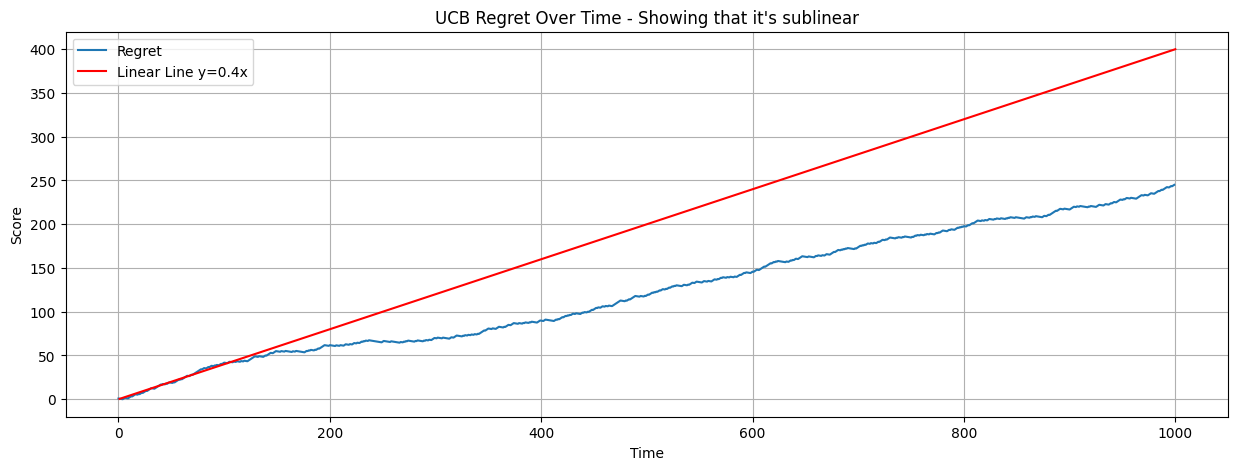

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(regret1000, label='Regret')
x_linear = np.arange(1, T+1)
a = 0.4
y_linear = a * x_linear  # Adjusted slope to match scale of regret
plt.plot(x_linear, y_linear, label=f'Linear Line y={str(a)}x', color='red')
plt.xlabel('Time')
plt.ylabel('Score')
plt.title("UCB Regret Over Time - Showing that it's sublinear")
plt.legend()
plt.grid()
plt.show()

In [8]:
from collections import Counter
Counter(articles_clicked)

Counter({2.0: 680, 3.0: 113, 4.0: 84, 1.0: 77, 0.0: 46})

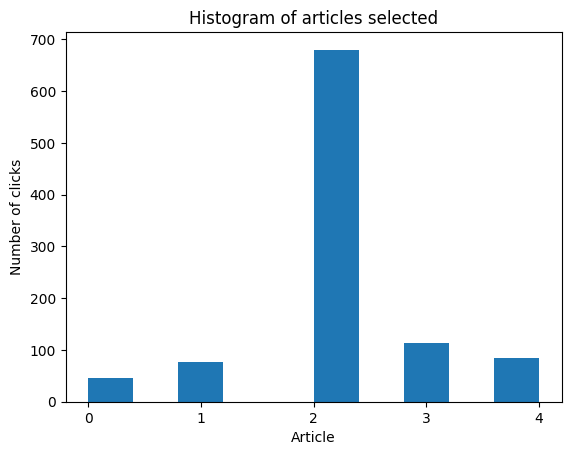

In [9]:
# showing which arm was picked the most
plt.hist(articles_clicked)
plt.title('Histogram of articles selected')
plt.xlabel('Article')
plt.ylabel('Number of clicks')
plt.locator_params(axis='x', integer=True)

In [10]:
# from statistics import mean 
# Delta = mean(deltas)

In [11]:
Delta = 0.3

In [12]:
E_R_T = 8 * U * K * (np.log(np.arange(1, T+1) / U) / Delta)

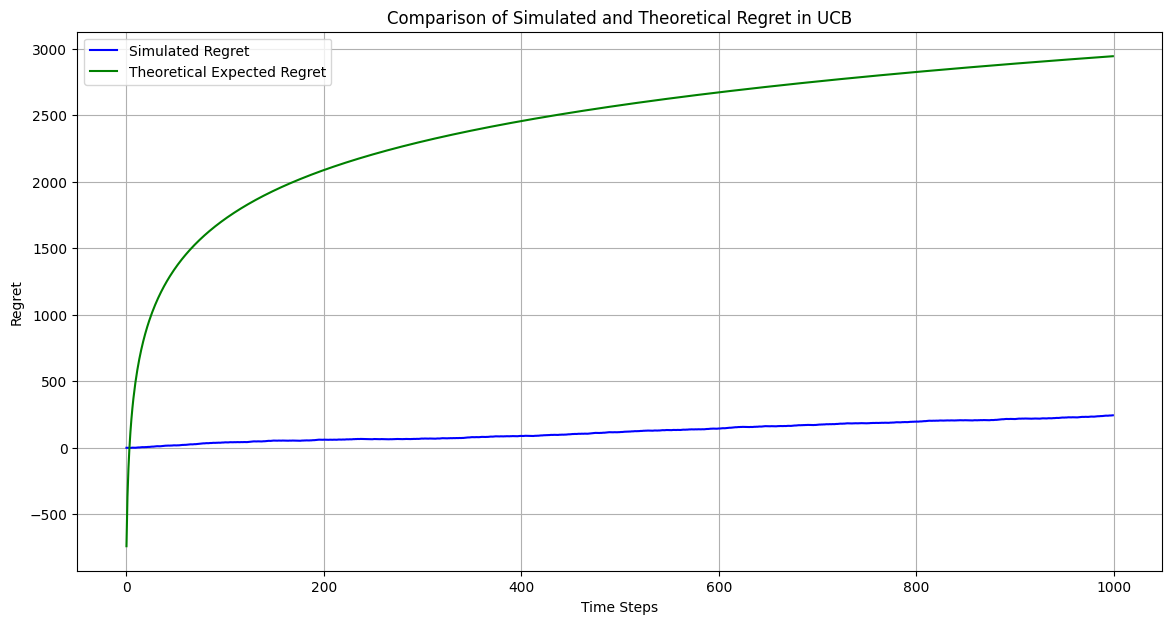

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(regret1000, label='Simulated Regret', color='blue')
plt.plot(E_R_T, label='Theoretical Expected Regret', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title('Comparison of Simulated and Theoretical Regret in UCB')
plt.legend()
plt.grid()
plt.show()

### Changing horizon to T = 10000

In [14]:
T = 10000    # horizon

article_clicks_amount = np.ones(K) # gets the number of clicks for each article
sums_of_rewards = np.zeros(K)      # sums of rewards for each arm
articles_clicked = np.zeros(T)     # articles that were clicked at time t
regret10000 = np.zeros(T)               # regret at round t 
best_score = np.zeros(T)           # score of the best arm at round t
alg_score = np.zeros(T)            # score of our algorithm at round t
rewards = np.zeros(T)              # reward at round t
deltas = np.zeros(T*K)             # delta at round t

for t in range(1, T+1):    # for each user T = t -> T % U 
    # user_index = (t - 1) % U
    user_index = np.random.randint(U)                          # get a random user
    best_article_reward = best_article_click_probs[user_index] # get the best article for the current user
    article = 0
    max_upper_bound = 0

    # get the upper bound for current t
    for i in range(K):   # for each article 
        # the more you select an article, you are more likely to not to select (diving by current article's clicks)
        # although if while clicking you get a positive reward the greater the chances you have to click it again (increasing it's reward)
        average_reward = sums_of_rewards[i] / article_clicks_amount[i]    # get the average reward 
        delta_i = math.sqrt(3/2 * math.log(t) / article_clicks_amount[i]) # get the delta_i
        current_upper_bound = average_reward + delta_i
        deltas[t] = delta_i
        
        if current_upper_bound > max_upper_bound:
            max_upper_bound = current_upper_bound
            article = i 

    reward = np.random.binomial(1,p=df.iloc[user_index, article])  # get a reward for arm j for current user
    # reward = df.iloc[(t-1)%U, article] # if probabilities were  { 0 , 1 }
    #print(reward)
    rewards[t-1] = reward # save the score for current t
    
    articles_clicked[t-1] = article # save the article for current t
    sums_of_rewards[article] += reward # increase article's reward
    article_clicks_amount[article] += 1  # increase article's clicks      

    # calculate the optimal and the algorithm's reward
    if t > 1:
        best_score[t-1] = best_score[t-2] + best_article_reward 
        alg_score[t-1] = alg_score[t-2] + reward
    else:
        best_score[t-1] = best_article_reward
        alg_score[t-1] = reward
    
    regret10000[t-1] = (best_score[t-1] - alg_score[t-1]) # calculate regret
    

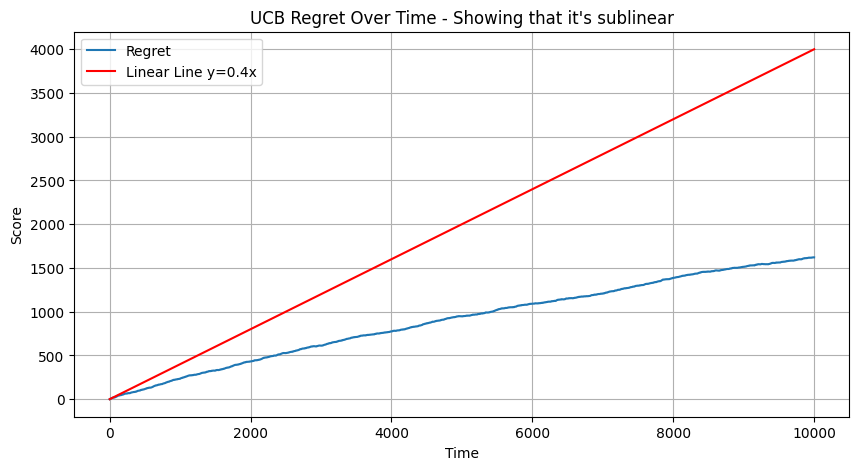

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(regret10000, label='Regret')
x_linear = np.arange(1, T+1)
a = 0.4
y_linear = a * x_linear  # Adjusted slope to match scale of regret
plt.plot(x_linear, y_linear, label=f'Linear Line y={str(a)}x', color='red')
plt.xlabel('Time')
plt.ylabel('Score')
plt.title("UCB Regret Over Time - Showing that it's sublinear")
plt.legend()
plt.grid()
plt.show()

In [16]:
Counter(articles_clicked)

Counter({2.0: 8554, 3.0: 572, 4.0: 553, 1.0: 221, 0.0: 100})

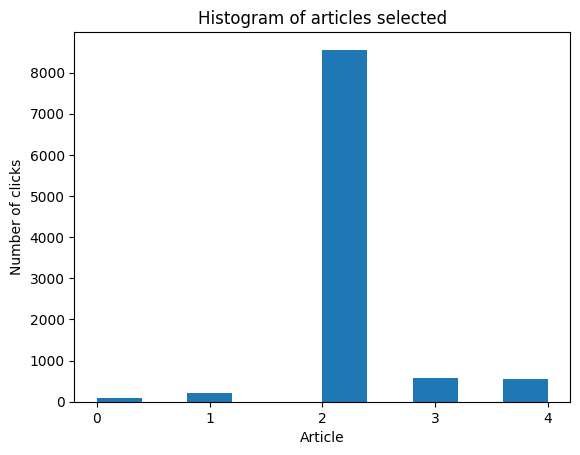

In [17]:
# showing which arm was picked the most and when it learns which arm is the best keeps playing it
plt.hist(articles_clicked)
plt.title('Histogram of articles selected')
plt.xlabel('Article')
plt.ylabel('Number of clicks')
plt.locator_params(axis='x', integer=True)

In [18]:
Delta = 0.3
E_R_T = 8 * U * K * (np.log(np.arange(1, T+1) / U) / Delta)

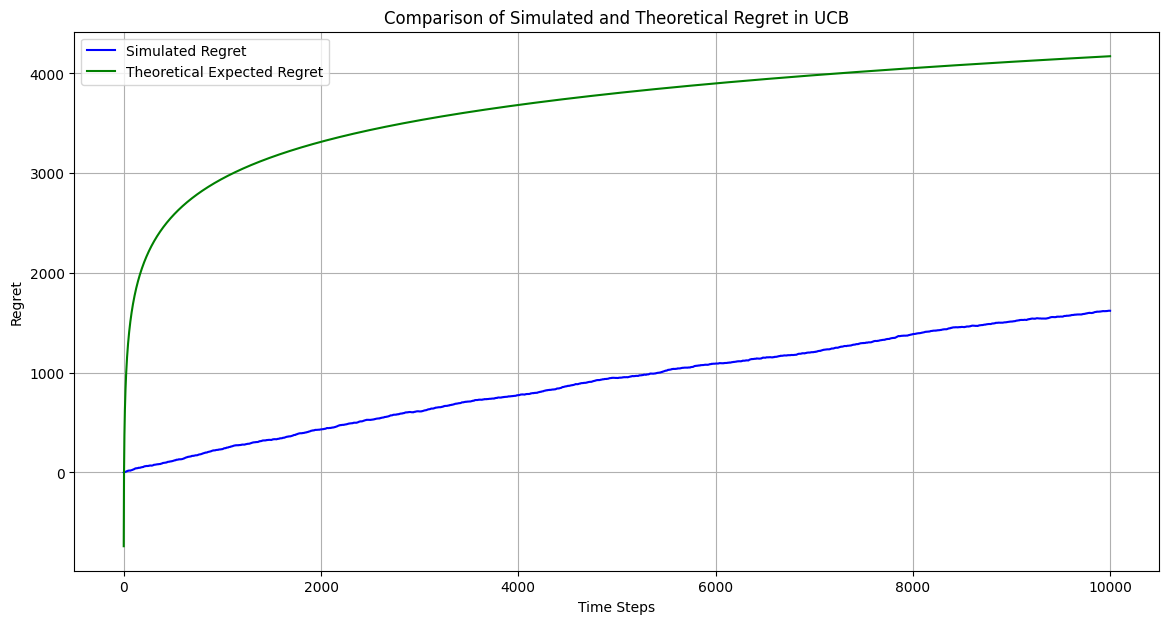

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(regret10000, label='Simulated Regret', color='blue')
plt.plot(E_R_T, label='Theoretical Expected Regret', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title('Comparison of Simulated and Theoretical Regret in UCB')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(regret1000, label='Simulated Regret for T=1000', color='blue')
plt.plot(regret10000, label='Simulated Regret for T=10000', color='red')
plt.plot(E_R_T, label='Theoretical Expected Regret', color='green')
plt.xlabel('Time Steps')
plt.xlim((0,1000))
plt.ylabel('Regret')
plt.title('Comparison of Simulated and Theoretical Regret in UCB')
plt.legend()
plt.grid()
plt.show()

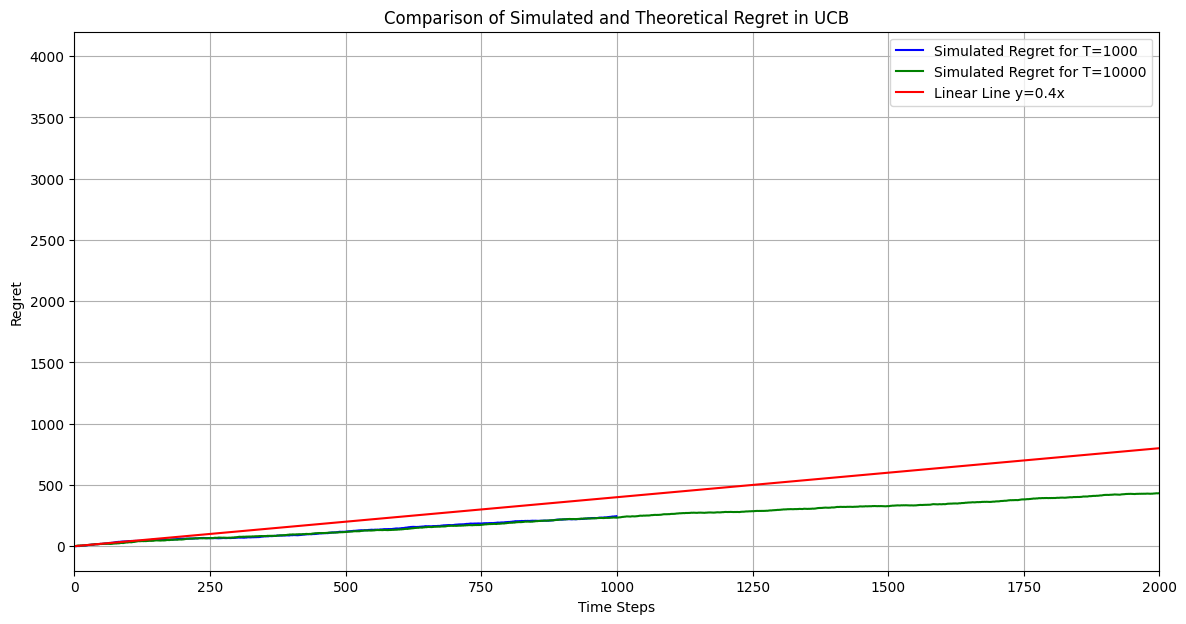

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(regret1000, label='Simulated Regret for T=1000', color='blue')
plt.plot(regret10000, label='Simulated Regret for T=10000', color='green')
plt.plot(x_linear, y_linear, label=f'Linear Line y={str(a)}x', color='red')
plt.xlim(0,2000)
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title('Comparison of Simulated and Theoretical Regret in UCB')
plt.legend()
plt.grid()
plt.show()